In [1]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df_behavioral = pd.read_csv("Behavioral_Data",index_col="Subject")
df_behavioral.index = df_behavioral.index.astype(str)
behavioral_columns = ['PicSeq_Unadj','CardSort_Unadj','Flanker_Unadj','PMAT24_A_CR','ReadEng_Unadj','PicVocab_Unadj','ProcSpeed_Unadj','VSPLOT_TC','SCPT_SEN','SCPT_SPEC','IWRD_TOT','ListSort_Unadj','MMSE_Score',
                     'PSQI_Score','Endurance_Unadj','Dexterity_Unadj','Strength_Unadj','Odor_Unadj','PainInterf_Tscore','Taste_Unadj','Mars_Final','Emotion_Task_Face_Acc','Language_Task_Math_Avg_Difficulty_Level',
                     'Language_Task_Story_Avg_Difficulty_Level','Relational_Task_Acc','Social_Task_Perc_Random','Social_Task_Perc_TOM','WM_Task_Acc','NEOFAC_A','NEOFAC_O','NEOFAC_C','NEOFAC_N','NEOFAC_E','ER40_CR','ER40ANG','ER40FEAR',
                     'ER40HAP','ER40NOE','ER40SAD','AngAffect_Unadj','AngHostil_Unadj','AngAggr_Unadj','FearAffect_Unadj','FearSomat_Unadj','Sadness_Unadj','LifeSatisf_Unadj','MeanPurp_Unadj','PosAffect_Unadj','Friendship_Unadj',
                     'Loneliness_Unadj','PercHostil_Unadj','PercReject_Unadj','EmotSupp_Unadj','InstruSupp_Unadj','PercStress_Unadj','SelfEff_Unadj','DDisc_AUC_40K','GaitSpeed_Comp']
behavioral_names =  ['Visual Episodic Memory','Cognitive Flexibility','Inhibition','Fluid Intelligence','Reading','Vocabulary','Processing Speed','Spatial Orientation','Sustained Attention_Sens','Sustained Attention_Spec','Verbal Episodic Memory','Working Memory (List soting)','Cognitive Status',
                 'Sleep Quality','Walking Endurance','Manual Dexterity','Grip Strength','Odor Identification','Pain Interference Survey','Taste Intensity','Contrast Sensitivity','Emotional Face Matching','Arithmetic',
                 'Story Comprehension','Relational Processing','Social Cognition_Random','Social Cognition_Interaction','Working Memory (N-back)','Agreeableness','Openness','Conscientiousness','Neuroticism','Extraversion','Emot. Recog. _ Total','Emot. Recog. _ Angry','Emot. Recog. _Fear',
                 'Emot. Recog. _ Happy','Emot. Recog. _ Neutral','Emot. Recog. _ Sad','Anger _ Affect','Anger _ Hostility','Anger _ Aggression','Fear _ Affect','Fear _ Somatic Arousal','Sadness','Life Satisfaction','Meaning & Purpose','Positive Affect','Friendship',
                 'Loneliness','Perceived Hostility','Perceived Rejection','Emotional Support','Instrument Support','Perceived Stress','Self-Efficacy','Delay Discounting','Walking Speed']
df_behavioral = df_behavioral[behavioral_columns]


In [3]:
imputer = IterativeImputer(max_iter=20, random_state=0)
df_imputed = imputer.fit_transform(df_behavioral)
zscore = StandardScaler()
df_scaled = zscore.fit_transform(df_imputed)
reducer = umap.UMAP(n_components=3)
df_umap = reducer.fit_transform(df_scaled)


In [4]:
# Compute correlation
correlations = np.corrcoef(df_scaled.T, df_umap.T)[:df_scaled.shape[1],df_scaled.shape[1]:]

In [5]:
pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Avoid truncating column names

corr_df = pd.DataFrame(
    correlations,
    index=[behavioral_names],
    columns=[f"UMAP_Comp_{j+1}" for j in range(df_umap.shape[1])]
)
print(corr_df)

                              UMAP_Comp_1  UMAP_Comp_2  UMAP_Comp_3
Visual Episodic Memory           0.290388     0.141210    -0.224094
Cognitive Flexibility            0.341204     0.205420    -0.052790
Inhibition                       0.223619     0.198562    -0.059048
Fluid Intelligence               0.345450     0.374523    -0.327865
Reading                          0.337627     0.400508    -0.419176
Vocabulary                       0.335651     0.383976    -0.412644
Processing Speed                 0.271477     0.175870    -0.118339
Spatial Orientation              0.287159     0.315018    -0.255345
Sustained Attention_Sens         0.139605     0.012519    -0.159281
Sustained Attention_Spec         0.190679     0.085629    -0.207073
Verbal Episodic Memory           0.260531     0.139228    -0.295540
Working Memory (List soting)     0.309704     0.265049    -0.217663
Cognitive Status                 0.241313     0.130809    -0.188758
Sleep Quality                   -0.349020     0.

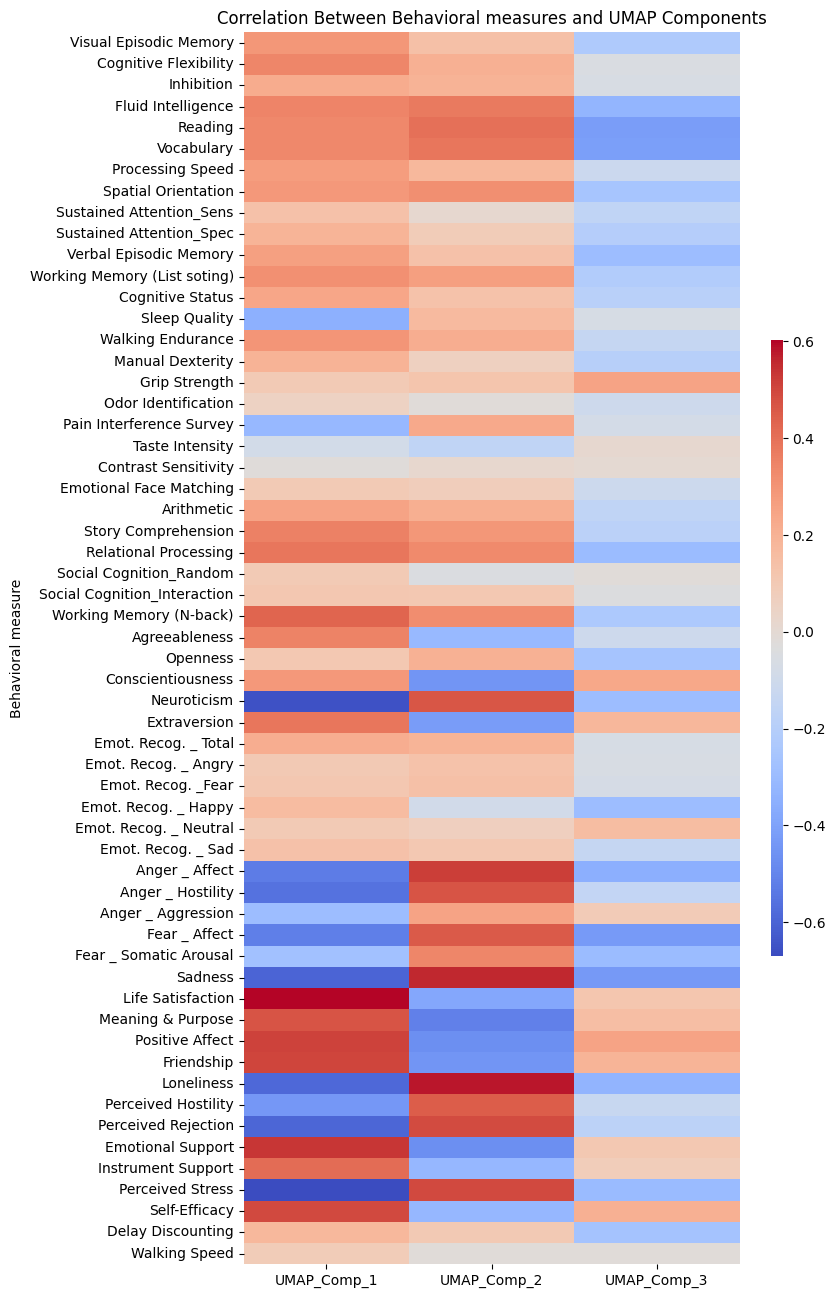

In [6]:
plt.figure(figsize=(8,16))
sns.heatmap(corr_df, cmap="coolwarm",cbar_kws={"shrink":0.5,"aspect":50})
plt.title("Correlation Between Behavioral measures and UMAP Components")
plt.ylabel("Behavioral measure")
plt.show()